In [1]:
import os
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import TwoSlopeNorm

from eofs.xarray import Eof
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

In [3]:
HW_Aspect = xr.open_dataset('Heatwave_Frequency,Duration_Cumulative_Heat_New_Method_1973_2022.nc')
HWF=  HW_Aspect.HWF
HWI = HW_Aspect.HWI
HWD = HW_Aspect.HWD

In [4]:
HWF_NCI = HWF.sel(latitude=slice(30,20),longitude=slice(70,80)).mean(dim=['latitude','longitude'])
HWI_NCI = HWI.sel(latitude=slice(30,20),longitude=slice(70,80)).mean(dim=['latitude','longitude'])
HWD_NCI = HWD.sel(latitude=slice(30,20),longitude=slice(70,80)).mean(dim=['latitude','longitude'])

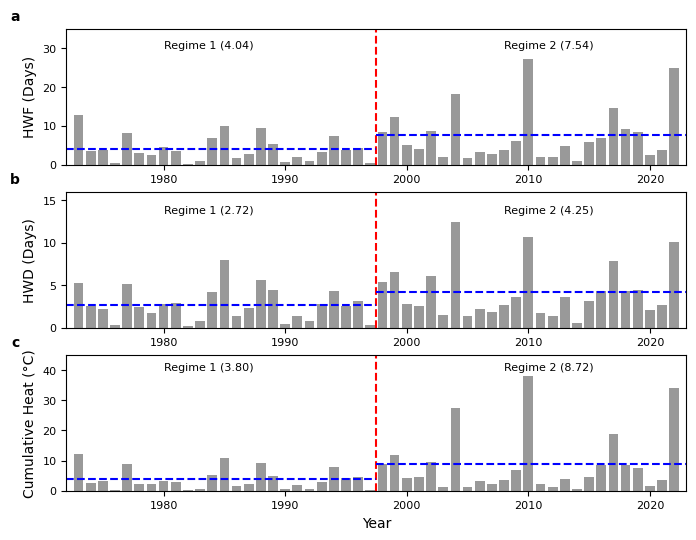

In [5]:
# Set up the figure with cartopy projection
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

axs[0].bar(HWF_NCI.year, HWF_NCI, color='gray',alpha=0.8)
axs[0].axvline(x=1997.5, color='r', linestyle='--')
R1 = HWF_NCI.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWF_NCI.sel(year=slice('1998','2022')).mean(dim='year').values
axs[0].axhline(y=R1,color='b',linestyle='--',xmin=0,xmax=0.5)
axs[0].axhline(y=R2,color='b',linestyle='--',xmin=0.5,xmax=1)
axs[0].set_xlim(1972,2023)
axs[0].set_ylim(0,35)
axs[0].text(1980, 30, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[0].text(2008, 30, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[0].set_ylabel('HWF (Days)', fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].text(-0.075, 1.04, 'a',verticalalignment='bottom', horizontalalignment='right',transform=axs[0].transAxes,color='k', weight='bold')

axs[1].bar(HWD_NCI.year, HWD_NCI, color='gray',alpha=0.8)
axs[1].axvline(x=1997.5, color='r', linestyle='--') 
R1 = HWD_NCI.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWD_NCI.sel(year=slice('1998','2022')).mean(dim='year').values
axs[1].axhline(y=R1,color='b', linestyle='--',xmin=0, xmax=0.5)
axs[1].axhline(y=R2,color='b', linestyle='--',xmin=0.5, xmax=1)
axs[1].set_xlim(1972,2023)
axs[1].set_ylim(0,16)
axs[1].text(1980, 13.5, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[1].text(2008, 13.5, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[1].set_ylabel('HWD (Days)', fontsize=10)
axs[1].set_xlabel('Year', fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].text(-0.075, 1.04, 'b',verticalalignment='bottom', horizontalalignment='right',transform=axs[1].transAxes,color='k', weight='bold')


axs[2].bar(HWI_NCI.year, HWI_NCI, color='gray',alpha=0.8)
axs[2].axvline(x=1997.5, color='r', linestyle='--')
R1 = HWI_NCI.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWI_NCI.sel(year=slice('1998','2022')).mean(dim='year').values
axs[2].axhline(y=R1,color='b', linestyle='--',xmin=0, xmax=0.5)
axs[2].axhline(y=R2,color='b', linestyle='--',xmin=0.5, xmax=1)
axs[2].set_xlim(1972,2023)
axs[2].set_ylim(0,45)
axs[2].text(1980, 40, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[2].text(2008, 40, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[2].set_ylabel('Cumulative Heat (°C)', fontsize=10)
axs[2].set_xlabel('Year', fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].text(-0.075, 1.04, 'c',verticalalignment='bottom', horizontalalignment='right',transform=axs[2].transAxes,color='k', weight='bold')
              
plt.savefig('Figure_3.png', dpi=600,bbox_inches='tight')
plt.savefig('Figure_3.pdf', dpi=600,bbox_inches='tight')

In [6]:
HWF_SR = HWF.sel(latitude=slice(40,20),longitude=slice(50,80)).mean(dim=['latitude','longitude'])
HWI_SR = HWI.sel(latitude=slice(40,20),longitude=slice(50,80)).mean(dim=['latitude','longitude'])
HWD_SR = HWD.sel(latitude=slice(40,20),longitude=slice(50,80)).mean(dim=['latitude','longitude'])


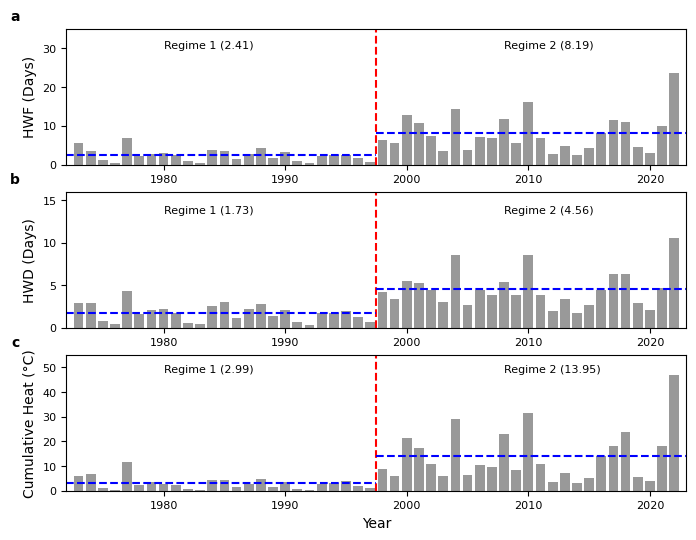

In [7]:
# Set up the figure with cartopy projection
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

axs[0].bar(HWF_SR.year, HWF_SR, color='gray',alpha=0.8)
axs[0].axvline(x=1997.5, color='r', linestyle='--')
R1 = HWF_SR.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWF_SR.sel(year=slice('1998','2022')).mean(dim='year').values
axs[0].axhline(y=R1,color='b',linestyle='--',xmin=0,xmax=0.5)
axs[0].axhline(y=R2,color='b',linestyle='--',xmin=0.5,xmax=1)
axs[0].set_xlim(1972,2023)
axs[0].set_ylim(0,35)
axs[0].text(1980, 30, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[0].text(2008, 30, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[0].set_ylabel('HWF (Days)', fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].text(-0.075, 1.04, 'a',verticalalignment='bottom', horizontalalignment='right',transform=axs[0].transAxes,color='k', weight='bold')

axs[1].bar(HWD_SR.year, HWD_SR, color='gray',alpha=0.8)
axs[1].axvline(x=1997.5, color='r', linestyle='--') 
R1 = HWD_SR.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWD_SR.sel(year=slice('1998','2022')).mean(dim='year').values
axs[1].axhline(y=R1,color='b', linestyle='--',xmin=0, xmax=0.5)
axs[1].axhline(y=R2,color='b', linestyle='--',xmin=0.5, xmax=1)
axs[1].set_xlim(1972,2023)
axs[1].set_ylim(0,16)
axs[1].text(1980, 13.5, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[1].text(2008, 13.5, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[1].set_ylabel('HWD (Days)', fontsize=10)
axs[1].set_xlabel('Year', fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].text(-0.075, 1.04, 'b',verticalalignment='bottom', horizontalalignment='right',transform=axs[1].transAxes,color='k', weight='bold')


axs[2].bar(HWI_SR.year, HWI_SR, color='gray',alpha=0.8)
axs[2].axvline(x=1997.5, color='r', linestyle='--')
R1 = HWI_SR.sel(year=slice('1973','1997')).mean(dim='year').values
R2 = HWI_SR.sel(year=slice('1998','2022')).mean(dim='year').values
axs[2].axhline(y=R1,color='b', linestyle='--',xmin=0, xmax=0.5)
axs[2].axhline(y=R2,color='b', linestyle='--',xmin=0.5, xmax=1)
axs[2].set_xlim(1972,2023)
axs[2].set_ylim(0,55)
axs[2].text(1980, 48, f"Regime 1 ({R1:.2f})", fontsize=8)
axs[2].text(2008,48, f"Regime 2 ({R2:.2f})", fontsize=8)
axs[2].set_ylabel('Cumulative Heat (°C)', fontsize=10)
axs[2].set_xlabel('Year', fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].text(-0.075, 1.04, 'c',verticalalignment='bottom', horizontalalignment='right',transform=axs[2].transAxes,color='k', weight='bold')
              
plt.savefig('SFigure_3.png', dpi=600,bbox_inches='tight')
plt.savefig('SFigure_3.pdf', dpi=600,bbox_inches='tight')